**Subject :** Creating a Correlation Matrix for BIST 30 <br>
**Data :** Jan 2020 - Sep 2024 Daily Returns of the BIST 30 Index <br>
**Objective :** Examining the Relationships Between Stocks in the Stock Market <br>

<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp; </p>

In [1]:
import pandas as pd
import yfinance as yf
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns

<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp; </p>

<p style="background-image: linear-gradient(#0aa98f, #FFFFFF 10%); font-weight:bold;"> 
    &nbsp; Collect Data </p>

In [2]:
shares = pd.read_excel('data/BIST_30.xlsx')
shares = shares + '.IS'   # To read stock market code on Yahoo Finance

data = yf.download(tickers=shares['Code'].to_list(), start='2020-01-01', end='2024-04-26')
data.head(3)

[*********************100%***********************]  30 of 30 completed


Price                     Adj Close                                          \
Ticker                     AKBNK.IS  ALARK.IS  ASELS.IS ASTOR.IS   BIMAS.IS   
Date                                                                          
2020-01-02 00:00:00+00:00  6.715157  5.610109  5.263545      NaN  39.000786   
2020-01-03 00:00:00+00:00  6.534554  5.469387  5.312327      NaN  39.892902   
2020-01-06 00:00:00+00:00  6.329322  5.384953  5.385499      NaN  40.128559   

Price                                                                        \
Ticker                    BRSAN.IS  EKGYO.IS  ENKAI.IS  EREGL.IS   FROTO.IS   
Date                                                                          
2020-01-02 00:00:00+00:00    11.70  1.362195  4.496717  6.586836  53.663269   
2020-01-03 00:00:00+00:00    11.15  1.325626  4.475737  6.485500  52.400154   
2020-01-06 00:00:00+00:00    10.78  1.289057  4.405804  6.420355  52.936020   

Price                      ...       Volume                                 \
Ticker                     ...     PETKM.IS PGSUS.IS   SAHOL.IS    SASA.IS   
Date                       ...                                               
2020-01-02 00:00:00+00:00  ...  225921846.0  5740079  9887484.0  573905617   
2020-01-03 00:00:00+00:00  ...  248993690.0  9669069  6741165.0  619985569   
2020-01-06 00:00:00+00:00  ...  126290880.0  7820159  5765204.0  446882741   

Price                                                                      \
Ticker                        SISE.IS    TCELL.IS     THYAO.IS   TOASO.IS   
Date                                                                        
2020-01-02 00:00:00+00:00  62036079.0  11656795.0  109370878.0   722220.0   
2020-01-03 00:00:00+00:00  62950188.0  10503970.0  153873531.0  1140365.0   
2020-01-06 00:00:00+00:00  65070398.0   5059795.0  136423179.0  1187295.0   

Price                                              
Ticker                       TUPRS.IS    YKBNK.IS  
Date                                               
2020-01-02 00:00:00+00:00  10267544.0  73011823.0  
2020-01-03 00:00:00+00:00  13947619.0  64698494.0  
2020-01-06 00:00:00+00:00   9460164.0  40200673.0  

[3 rows x 180 columns]

In [3]:
df = data['Adj Close'].copy()
df.head(3)

Ticker,AKBNK.IS,ALARK.IS,ASELS.IS,ASTOR.IS,BIMAS.IS,BRSAN.IS,EKGYO.IS,ENKAI.IS,EREGL.IS,FROTO.IS,...,PETKM.IS,PGSUS.IS,SAHOL.IS,SASA.IS,SISE.IS,TCELL.IS,THYAO.IS,TOASO.IS,TUPRS.IS,YKBNK.IS
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02 00:00:00+00:00,6.715157,5.610109,5.263545,NaN,39.000786,11.70,1.362195,4.496717,6.586836,53.663269,...,3.250000,17.575089,8.050210,0.156897,4.828518,12.062000,14.83,17.478039,14.179037,2.105268
2020-01-03 00:00:00+00:00,6.534554,5.469387,5.312327,NaN,39.892902,11.15,1.325626,4.475737,6.485500,52.400154,...,3.166666,16.971521,7.854659,0.154312,4.774163,11.907359,14.27,17.256134,13.924258,2.046788
2020-01-06 00:00:00+00:00,6.329322,5.384953,5.385499,NaN,40.128559,10.78,1.289057,4.405804,6.420355,52.936020,...,3.058333,16.327032,7.667253,0.149738,4.638275,11.761310,13.57,17.073391,13.702713,2.005017


<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp; </p>

<p style="background-image: linear-gradient(#0aa98f, #FFFFFF 10%); font-weight:bold;"> 
    &nbsp; Drop Missing Data </p>

In [4]:
# df.isna().sum()

In [5]:
# df.info()
# df.isna().sum()
display(df[df['AKBNK.IS'].isna()])

temp = [df[df['AKBNK.IS'].isna()].count()==1]
temp = pd.DataFrame(temp).T
temp = temp[temp[0]==True].T
display(temp)

df.shape

Ticker,AKBNK.IS,ALARK.IS,ASELS.IS,ASTOR.IS,BIMAS.IS,BRSAN.IS,EKGYO.IS,ENKAI.IS,EREGL.IS,FROTO.IS,...,PETKM.IS,PGSUS.IS,SAHOL.IS,SASA.IS,SISE.IS,TCELL.IS,THYAO.IS,TOASO.IS,TUPRS.IS,YKBNK.IS
Date,,,,,,,,,,,,,,,,,,,,,
2024-04-09 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,179.02449,NaN,5.0475,NaN,NaN,NaN,NaN,NaN,NaN


Ticker,KONTR.IS,PGSUS.IS,SASA.IS
0,True,True,True


(1081, 30)

In [6]:
df.dropna(axis=0, thresh=df.shape[1]-2, inplace=True)
df.dropna(axis=1, inplace=True)
display(df.tail(3))
df.shape

Ticker,AKBNK.IS,ALARK.IS,ASELS.IS,BIMAS.IS,BRSAN.IS,EKGYO.IS,ENKAI.IS,EREGL.IS,FROTO.IS,GARAN.IS,...,PETKM.IS,PGSUS.IS,SAHOL.IS,SASA.IS,SISE.IS,TCELL.IS,THYAO.IS,TOASO.IS,TUPRS.IS,YKBNK.IS
Date,,,,,,,,,,,,,,,,,,,,,
2024-04-22 00:00:00+00:00,59.849998,113.771851,57.799999,365.685577,600.5,9.04,34.968449,41.580002,1122.0,76.449997,...,20.120001,188.538361,82.967438,5.0000,47.430923,77.400002,302.75,264.00,175.264069,30.580000
2024-04-24 00:00:00+00:00,60.299999,113.275902,58.299999,363.708893,594.0,9.25,34.987801,41.700001,1105.0,79.699997,...,20.260000,198.052231,85.387726,5.0175,48.160931,78.300003,309.75,269.75,174.613220,31.180000
2024-04-25 00:00:00+00:00,57.450001,113.871048,57.450001,368.403503,593.5,9.24,35.839275,41.599998,1091.0,79.099998,...,20.219999,197.131531,86.210632,4.9950,48.042553,78.500000,313.25,270.25,176.286835,29.940001


(1080, 28)

In [7]:
# df.isna().sum()

<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp; </p>

<p style="background-image: linear-gradient(#0aa98f, #FFFFFF 10%); font-weight:bold;"> 
    &nbsp; Price </p>

In [8]:
price = df.copy()
display(price.head(3))

Ticker,AKBNK.IS,ALARK.IS,ASELS.IS,BIMAS.IS,BRSAN.IS,EKGYO.IS,ENKAI.IS,EREGL.IS,FROTO.IS,GARAN.IS,...,PETKM.IS,PGSUS.IS,SAHOL.IS,SASA.IS,SISE.IS,TCELL.IS,THYAO.IS,TOASO.IS,TUPRS.IS,YKBNK.IS
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02 00:00:00+00:00,6.715157,5.610109,5.263545,39.000786,11.70,1.362195,4.496717,6.586836,53.663269,9.591985,...,3.250000,17.575089,8.050210,0.156897,4.828518,12.062000,14.83,17.478039,14.179037,2.105268
2020-01-03 00:00:00+00:00,6.534554,5.469387,5.312327,39.892902,11.15,1.325626,4.475737,6.485500,52.400154,9.327906,...,3.166666,16.971521,7.854659,0.154312,4.774163,11.907359,14.27,17.256134,13.924258,2.046788
2020-01-06 00:00:00+00:00,6.329322,5.384953,5.385499,40.128559,10.78,1.289057,4.405804,6.420355,52.936020,9.029755,...,3.058333,16.327032,7.667253,0.149738,4.638275,11.761310,13.57,17.073391,13.702713,2.005017


<p style="background-image: linear-gradient(#0aa98f, #FFFFFF 10%); font-weight:bold;"> 
    &nbsp; Return </p>

In [9]:
returns = price.pct_change()
display(returns.head(4))

Ticker,AKBNK.IS,ALARK.IS,ASELS.IS,BIMAS.IS,BRSAN.IS,EKGYO.IS,ENKAI.IS,EREGL.IS,FROTO.IS,GARAN.IS,...,PETKM.IS,PGSUS.IS,SAHOL.IS,SASA.IS,SISE.IS,TCELL.IS,THYAO.IS,TOASO.IS,TUPRS.IS,YKBNK.IS
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03 00:00:00+00:00,-0.026895,-0.025084,0.009268,0.022874,-0.047009,-0.026846,-0.004666,-0.015385,-0.023538,-0.027531,...,-0.025641,-0.034342,-0.024291,-0.016476,-0.011257,-0.012821,-0.037761,-0.012696,-0.017969,-0.027778
2020-01-06 00:00:00+00:00,-0.031407,-0.015437,0.013774,0.005907,-0.033184,-0.027586,-0.015625,-0.010045,0.010226,-0.031963,...,-0.034210,-0.037975,-0.023859,-0.029641,-0.028463,-0.012265,-0.049054,-0.010590,-0.015911,-0.020408
2020-01-07 00:00:00+00:00,0.010376,0.015679,0.015398,0.007550,0.024119,0.007092,0.017460,0.006764,0.031815,-0.000943,...,0.010899,-0.003759,0.004251,0.022573,0.000000,0.015340,-0.002211,0.016055,-0.006467,0.000000


<p style="background-image: linear-gradient(#0aa98f, #FFFFFF 10%); font-weight:bold;"> 
    &nbsp; Volatility </p>

In [10]:
sd = returns.std()
display(sd.sort_values(ascending=False).to_frame().head(10).T)

Ticker,BRSAN.IS,HEKTS.IS,GUBRF.IS,SASA.IS,ODAS.IS,PGSUS.IS,KRDMD.IS,KOZAL.IS,EKGYO.IS,OYAKC.IS
0,0.040444,0.038631,0.037783,0.03761,0.037021,0.034223,0.032854,0.032007,0.031496,0.03116


<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp; </p>

<p style="background-image: linear-gradient(#0aa98f, #FFFFFF 10%); font-weight:bold;"> 
    &nbsp; Correlation </p>

In [11]:
correlation = returns.corr()

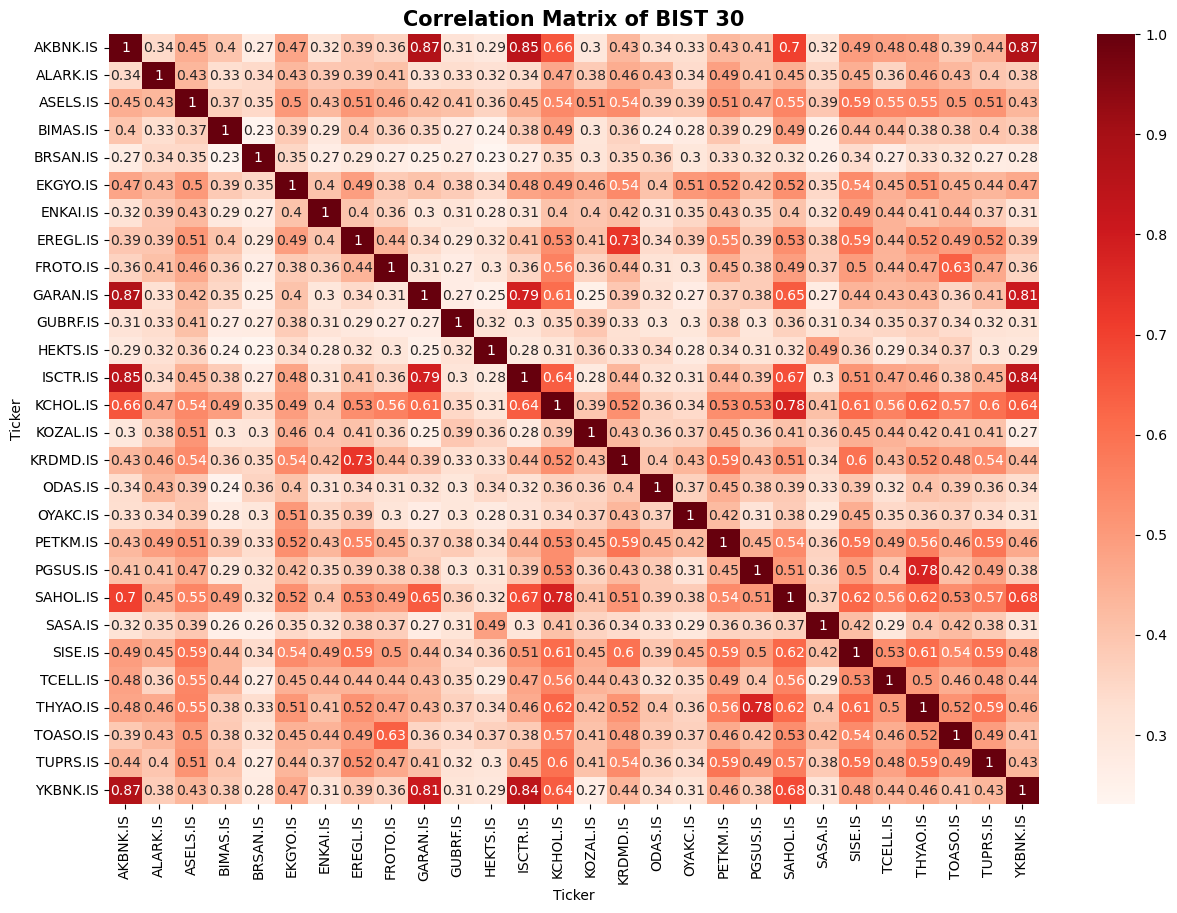

In [12]:
sns.heatmap(correlation, annot=True, cmap='Reds', 
            xticklabels=True, yticklabels=True) # vmin=-1, vmax=1

plt.gcf().set_size_inches(15,10)
plt.title('Correlation Matrix of BIST 30', fontsize=15, fontweight='bold')
plt.show()

In [13]:
significance = pg.pairwise_corr(returns)
display(significance.sample(5))

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
223,GARAN.IS,TUPRS.IS,pearson,two-sided,1079,0.411569,"[0.36, 0.46]",2.316940e-45,8.046e+41,1.0
64,ASELS.IS,KOZAL.IS,pearson,two-sided,1079,0.513126,"[0.47, 0.56]",1.625828e-73,8.176e+69,1.0
103,BRSAN.IS,ENKAI.IS,pearson,two-sided,1079,0.268548,"[0.21, 0.32]",2.796021e-19,1.133e+16,1.0
63,ASELS.IS,KCHOL.IS,pearson,two-sided,1079,0.542985,"[0.5, 0.58]",9.019412e-84,1.334e+80,1.0
25,AKBNK.IS,TUPRS.IS,pearson,two-sided,1079,0.438619,"[0.39, 0.49]",5.901152e-52,2.884e+48,1.0


In [14]:
# display(significance[significance['p-unc']<0.05])
display(significance[significance['r']>0.7])

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
8,AKBNK.IS,GARAN.IS,pearson,two-sided,1079,0.868814,"[0.85, 0.88]",0.000000e+00,inf,1.0
11,AKBNK.IS,ISCTR.IS,pearson,two-sided,1079,0.846786,"[0.83, 0.86]",1.609716e-297,1.93e+293,1.0
26,AKBNK.IS,YKBNK.IS,pearson,two-sided,1079,0.868164,"[0.85, 0.88]",0.000000e+00,inf,1.0
175,EREGL.IS,KRDMD.IS,pearson,two-sided,1079,0.726839,"[0.7, 0.75]",6.241013e-178,9.655e+173,1.0
209,GARAN.IS,ISCTR.IS,pearson,two-sided,1079,0.787010,"[0.76, 0.81]",3.810275e-228,1.179e+224,1.0
224,GARAN.IS,YKBNK.IS,pearson,two-sided,1079,0.808362,"[0.79, 0.83]",4.387109e-250,9.081e+245,1.0
272,ISCTR.IS,YKBNK.IS,pearson,two-sided,1079,0.843039,"[0.82, 0.86]",2.417587e-292,1.319e+288,1.0
279,KCHOL.IS,SAHOL.IS,pearson,two-sided,1079,0.780483,"[0.76, 0.8]",6.143601e-222,7.573e+217,1.0
346,PGSUS.IS,THYAO.IS,pearson,two-sided,1079,0.777022,"[0.75, 0.8]",9.856891e-219,4.806e+214,1.0


<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp; </p>